# Análise do banco de dados de preço de medicamentos no Brasil.

# Motivação:
A análise exploratória é fundamental para a compreensão inicial dos dados, ou seja, a analise consegue um entendimento básico dos dados, através da observação das relações existentes entre as variáveis.

A ideia desse projeto é iniciar a prática no mundo da análise de dados, com o intuito de, melhorar minhas habilidades em Python, criar hipóteses para a exploração dos dados, apresentar análises com dataviz, e finalmente exercitar a prática de tirar insights a partir dos dados.

# Finalidade do estudo:

O projeto visa analisar o datasets de Preço de Medicamentos no Brasil - Consumidor, retirado do Portal Brasileiro de Dados Abertos.<br>

Vamos investigar algumas hipóteses juntos:<br>
Quais as substâncias mais produzidas/importadas pelos laboratórios?<br>
Quantos laboratórios diferentes produziram/importaram a substância mais produzida/importada?<br>
Como está a distribuição de preço dessa substância?<br>
Quais os laboratórios com maior produção/import de substâncias?<br>
Qual a substância mais produzida pela indústria que mais aparece na base de dados?<br>
Qual o tipo de medicamento mais produzido por essa empresa?<br>

## Bibliotecas:

In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Carregando os dados:

In [4]:
df = pd.read_csv('medicamentos.csv', sep=';', on_bad_lines='skip', encoding='latin-1')
df.head(10)

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,520500901178410,57600510011,7896210500354,-,-,TALCO ALÍVIO,TALQUEIRA C/ 100 G,...,"8,50","9,70",Não,Não,Não,Não,NaN,Negativa,Não,Tarja -(*)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,530917060013104,1002001390025,7896116871497,-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,...,"163,25","186,12",Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha(*)
2,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525500402113310,1002900020141,7897337705905,-,-,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",...,"73,78","75,62",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
3,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525500401117312,1002900020158,7897337705912,-,-,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,...,"48,45","49,67",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502006118219,1002900050014,7897337706575,-,-,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,...,"75,32","77,20",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
5,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502002112216,1002900050022,7897337706568,-,-,SINGULAIR,10 MG COM REV CT 3 BL AL PLAS INC X 10,...,"75,32","77,20",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
6,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502003119214,1002900050057,7897337706490,-,-,SINGULAIR,4 MG COM MAST CT BL AL PLAS INC X 10,...,"50,63","51,90",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
7,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502004115212,1002900050065,7897337706506,-,-,SINGULAIR,4 MG COM MAST CT 3 BL AL PLAS INC X 10,...,"75,32","77,20",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
8,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502005111210,1002900050073,7897337706520,-,-,SINGULAIR,5 MG COM MAST CT BL AL PLAS INC X 10,...,"50,63","51,90",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
9,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502001116218,1002900050081,7897337706551,-,-,SINGULAIR,10 MG COM REV CT BL AL PLAS INC X 10,...,"50,63","51,90",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha


## Descrição dos dados:

#### Informações sobre os dados:

O datasets contém dados de (listados os mais importantes para a análise);<br>
. SUBSTÂNCIA: É uma substância química ativa, fármaco, droga ou matéria-prima que tenha propriedades farmacológicas com finalidade medicamentosa, utilizada para diagnóstico, alívio ou tratamento, empregada para modificar ou explorar sistemas fisiológicos ou estados patológicos, em benefício da pessoa na qual se administra;<br>
. LABORATÓRIO: É o nome da empresa detentora do registro sanitário podendo ser a produtora ou importadora do medicamento;<br>
. PRODUTO: É o nome comercial dado ao medicamento, em determinada apresentação, de um referido laboratório, no caso dos medicamentos genéricos é igual ao Princípio Ativo;<br>
. APRESENTAÇÃO: É a descrição de como o medicamento é apresentado, quanto a sua forma farmacêutica, dosagem e quantidade;<br>
. CLASSE TERAPÊUTICA: É a Classificação Anatômica de Produtos Farmacêuticos. Está relacionado com a finalidade e o local de atuação do medicamento de acordo com a Associação Europeia de Pesquisa de Mercado Farmacêutico (EphMRA);<br>
. TIPO DE PRODUTO (STATUS DO PRODUTO): Tipo é a categorização do medicamento por tipo de produto em Biológicos, Biológico Novo, Similar, Genérico, Novo, Específico,Radiofármaco;<br>
. PF 0%, PF 12%, PF 17%, PF 17% ALC, PF 17,5%, PF 17,5% ALC, PF 18%, PF 18% ALC, PF
20%, PF Sem Impostos, Preço Fábrica: É o teto de preço pelo qual um laboratório ou distribuidor de medicamentos pode comercializar no mercado brasileiro um medicamento. Desta maneira, o PF vem a ser o preço máximo permitido para vendas de medicamentos destinadas a farmácias, drogarias, além das destinadas a entes da Administração Pública;<br>
. PMC 0%, PMC 12%, PMC 17%, PMC 17% ALC, PMC 17,5%, PMC 17,5% ALC, PMC 18%,
PMC 18% ALC, PMC 20%, Preço Máximo ao Consumidor ou PMC:  É o preço a ser praticado pelo comércio varejista de medicamentos, ou seja, farmácias e drogarias, tendo em vista que este contempla tanto a margem de lucro como os impostos inerentes a esses tipos de comércio;<br>
. TARJA: Indica qual se a venda do medicamento necessita de receita.<br>

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   SUBSTÂNCIA                                             26310 non-null  object
 1   CNPJ                                                   26310 non-null  object
 2   LABORATÓRIO                                            26310 non-null  object
 3   CÓDIGO GGREM                                           26310 non-null  int64 
 4   REGISTRO                                               26310 non-null  object
 5   EAN 1                                                  26310 non-null  object
 6   EAN 2                                                  26310 non-null  object
 7   EAN 3                                                  26310 non-null  object
 8   PRODUTO                                                2

### Transformando variáveis:

Observa-se à cima que as variáveis quantitativas contínuas (preços) vieram como o tipo `object`, então realizou-se a transformação para o tipo `float` para a melhor manipulação dessas. 

In [4]:
colunas = ['PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%', 'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 20%',  
    'PMC 0%', 'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%', 'PMC 17,5% ALC', 'PMC 18%', 'PMC 18% ALC', 'PMC 20%']

df[colunas] = df[colunas].apply(lambda x: x.str.replace(',', '.').astype('float'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   SUBSTÂNCIA                                             26310 non-null  object 
 1   CNPJ                                                   26310 non-null  object 
 2   LABORATÓRIO                                            26310 non-null  object 
 3   CÓDIGO GGREM                                           26310 non-null  int64  
 4   REGISTRO                                               26310 non-null  object 
 5   EAN 1                                                  26310 non-null  object 
 6   EAN 2                                                  26310 non-null  object 
 7   EAN 3                                                  26310 non-null  object 
 8   PRODUTO                                       

In [6]:
df.dtypes.value_counts()

object     21
float64    18
int64       1
dtype: int64

### Observando valores nulos:

Nesta parte utilizei a função `.isnull()` para observar se há valores missing no datasets.

In [7]:
df.isnull().sum()

SUBSTÂNCIA                                                   0
CNPJ                                                         0
LABORATÓRIO                                                  0
CÓDIGO GGREM                                                 0
REGISTRO                                                     0
EAN 1                                                        0
EAN 2                                                        0
EAN 3                                                        0
PRODUTO                                                      0
APRESENTAÇÃO                                                 0
CLASSE TERAPÊUTICA                                           0
TIPO DE PRODUTO (STATUS DO PRODUTO)                          0
REGIME DE PREÇO                                              0
PF Sem Impostos                                              0
PF 0%                                                        0
PF 12%                                                 

## Analisando as estatísticas descritivas:

Foi realizado a estatística descritiva das variáveis quantitativas, e a contagem das variáveis categóricas.

In [9]:
df.describe()

,CÓDIGO GGREM,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 20%,PMC 0%,PMC 12%,PMC 17%,PMC 17% ALC,"PMC 17,5%","PMC 17,5% ALC",PMC 18%,PMC 18% ALC,PMC 20%
count,2.631000e+04,2.631000e+04,2.631000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,21856.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.240225e+14,3.018261e+03,3.322243e+03,3.871753e+03,4.135686e+03,3.669112e+03,4.164080e+03,3.691351e+03,4.192866e+03,4.312130e+03,756.823985,830.907444,884.357835,832.735416,890.085886,837.782519,895.888222,842.890945,919.884723
std,1.744286e+13,7.542025e+04,8.443859e+04,9.909295e+04,1.059627e+05,9.228082e+04,1.067026e+05,9.284013e+04,1.074528e+05,1.105627e+05,7309.308647,8370.565722,8913.252419,8338.410975,8971.445577,8388.948910,9030.399781,8440.100728,9274.283663
min,5.001001e+14,3.900000e-01,3.900000e-01,9.200000e-01,9.800000e-01,9.800000e-01,9.800000e-01,9.800000e-01,9.900000e-01,1.010000e+00,1.120000,1.270000,1.350000,1.350000,1.350000,1.350000,1.370000,1.370000,1.400000
25%,5.080191e+14,2.018000e+01,2.112000e+01,2.382000e+01,2.537000e+01,2.403000e+01,2.555000e+01,2.418000e+01,2.572000e+01,2.640000e+01,25.557500,28.960000,30.790000,29.460000,31.000000,29.640000,31.200000,29.820000,32.060000
50%,5.253090e+14,5.281500e+01,5.429500e+01,6.026000e+01,6.404000e+01,6.165500e+01,6.442000e+01,6.203000e+01,6.482000e+01,6.652000e+01,57.610000,64.750000,68.790000,66.550000,69.210000,66.950000,69.650000,67.370000,71.520000
75%,5.362025e+14,1.679500e+02,1.726500e+02,1.855925e+02,1.971650e+02,1.916600e+02,1.984425e+02,1.928200e+02,1.996625e+02,2.047100e+02,148.140000,164.690000,175.030000,170.040000,176.100000,171.080000,177.170000,172.110000,181.730000
max,5.973211e+14,2.570452e+06,2.878906e+06,3.326829e+06,3.557545e+06,3.096929e+06,3.582393e+06,3.115699e+06,3.607589e+06,3.712036e+06,477745.060000,542892.290000,575596.330000,575596.330000,579084.820000,579084.820000,582615.830000,582615.830000,597181.330000


In [14]:
df.groupby('SUBSTÂNCIA')['SUBSTÂNCIA'].count().sort_values(ascending=False).head(20)

SUBSTÂNCIA
COLECALCIFEROL                         451
OLANZAPINA                             219
PREGABALINA                            218
PARACETAMOL                            217
OXALATO DE ESCITALOPRAM                207
ROSUVASTATINA CÁLCICA                  201
HEMIFUMARATO DE QUETIAPINA             194
RISPERIDONA                            186
IBUPROFENO                             180
CITRATO DE SILDENAFILA                 178
SINVASTATINA                           171
PANTOPRAZOL SÓDICO SESQUI-HIDRATADO    169
ATORVASTATINA CÁLCICA                  160
RIVAROXABANA                           157
MONTELUCASTE DE SÓDIO                  153
CAPTOPRIL                              151
MALEATO DE ENALAPRIL                   148
CLORETO DE SÓDIO                       148
ATENOLOL                               145
CLORIDRATO DE SERTRALINA               144
Name: SUBSTÂNCIA, dtype: int64

**Observa-se as 20 substâncias mais produzidas/importadas no datasets.<br>**
A substância que tem mais presença na base de dados é o **Colecalciferol**, que é um medicamento indicado para prevenção e tratamento auxiliar na desmineralização óssea, do raquitismo, osteomalacia e prevenção no risco de quedas e fraturas.

In [71]:
df.loc[(df['SUBSTÂNCIA']=='COLECALCIFEROL')].groupby('LABORATÓRIO')['SUBSTÂNCIA'].unique().value_counts()

[COLECALCIFEROL]    33
Name: SUBSTÂNCIA, dtype: int64

In [73]:
df.loc[(df['SUBSTÂNCIA']=='COLECALCIFEROL')].groupby('SUBSTÂNCIA')['LABORATÓRIO'].value_counts()

SUBSTÂNCIA      LABORATÓRIO                                       
COLECALCIFEROL  ALTHAIA S.A INDÚSTRIA FARMACÊUTICA                    81
                MYRALIS INDÚSTRIA FARMACÊUTICA LTDA                   39
                COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS S.A.    35
                ABBOTT LABORATÓRIOS DO BRASIL LTDA                    23
                BIOLAB SANUS FARMACÊUTICA LTDA                        23
                ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                   22
                BRASTERAPICA INDUSTRIA FARMACEUTICA EIRELI            20
                APSEN FARMACEUTICA S/A                                17
                UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A               16
                CIMED INDUSTRIA S.A.                                  12
                SANOFI MEDLEY FARMACÊUTICA LTDA.                      12
                EMS S/A                                               11
                EMS SIGMA PHARMA LTDA                    

**Temos que 33 empresas diferentes realizaram a produção de Colecalciferol.** 

In [88]:
df_col.describe()

,CÓDIGO GGREM,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 20%,PMC 0%,PMC 12%,PMC 17%,PMC 17% ALC,"PMC 17,5%","PMC 17,5% ALC",PMC 18%,PMC 18% ALC,PMC 20%
count,4.510000e+02,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,5.323673e+14,124.074124,138.652129,160.175033,171.256696,149.486652,172.449446,150.392683,173.659357,178.674435,186.103038,214.096519,228.426763,206.656563,229.965876,207.909424,231.526319,209.177561,237.988115
std,2.282524e+13,245.242066,274.489950,317.171819,339.154096,295.472606,341.521658,297.263327,343.922213,353.873187,368.275429,423.744950,452.146754,408.473702,455.198864,410.948986,458.291910,413.455104,471.102002
min,5.002191e+14,3.290000,3.680000,4.250000,4.550000,3.960000,4.580000,3.980000,4.610000,4.740000,4.940000,5.680000,6.060000,5.470000,6.100000,5.500000,6.140000,5.540000,6.310000
25%,5.064201e+14,25.125000,28.140000,32.245000,34.435000,30.270000,34.675000,30.455000,34.920000,35.930000,37.745000,43.430000,46.355000,41.845000,46.665000,42.105000,46.985000,42.360000,48.300000
50%,5.388190e+14,52.570000,57.430000,66.370000,70.970000,63.340000,71.460000,63.720000,71.970000,74.050000,78.380000,89.070000,94.600000,87.560000,95.230000,88.090000,95.890000,88.630000,98.560000
75%,5.438201e+14,133.620000,149.650000,172.930000,184.930000,160.980000,186.220000,161.960000,187.530000,192.960000,200.750000,231.000000,246.500000,222.550000,248.160000,223.900000,249.850000,225.270000,256.840000
max,5.767201e+14,2366.710000,2650.720000,3063.140000,3275.570000,2851.460000,3298.450000,2868.740000,3321.650000,3417.810000,3555.850000,4091.690000,4366.090000,3941.980000,4395.580000,3965.860000,4425.460000,3990.060000,4549.220000


**Nota-se à cima a estatística descritiva do preço dessa substância.<br>**

**A partir disso foi realizado um histograma para observar a distribuição do preço.**

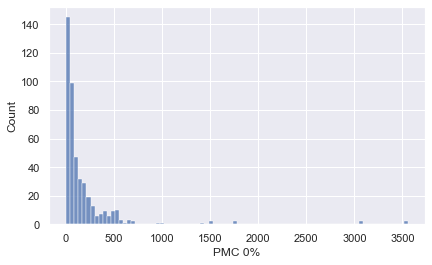

In [87]:
df_col = df.loc[(df['SUBSTÂNCIA']=='COLECALCIFEROL')]
sns.histplot(data=df_col, x='PMC 0%');

In [89]:
print('distorção: %f' % df_col['PMC 0%'].skew())
print('curtose: %f' % df_col['PMC 0%'].kurt())

distorção: 6.220558
curtose: 47.273763


**O primeiro histograma mostra a distribuição do preço máximo ao consumidor com 0% de tributação.<br>**

**Já o segundo demonstra a distribuição para o preço máxima final sem impostos também, ou seja, o teto que um laboratório pode praticar de preço a um determinado produto para as farmácias.**

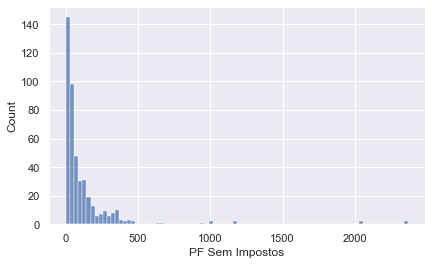

In [90]:
df_col = df.loc[(df['SUBSTÂNCIA']=='COLECALCIFEROL')]
sns.histplot(data=df_col, x='PF Sem Impostos');

In [91]:
print('distorção: %f' % df_col['PF Sem Impostos'].skew())
print('curtose: %f' % df_col['PF Sem Impostos'].kurt())

distorção: 6.210265
curtose: 47.153117


In [14]:
df['LABORATÓRIO'].value_counts().reset_index().head(21)

,index,LABORATÓRIO
0,EMS S/A,1476
1,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,1122
2,PRATI DONADUZZI & CIA LTDA,883
3,LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA,875
4,GERMED FARMACEUTICA LTDA,870
5,SANOFI MEDLEY FARMACÊUTICA LTDA.,864
6,EUROFARMA LABORATÓRIOS S.A.,779
7,NOVA QUIMICA FARMACÊUTICA S/A,755
8,GEOLAB INDÚSTRIA FARMACÊUTICA S/A,736
9,CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.,713


**Nota-se os 20 maiores laboratórios da base de dados.<br>**


**Dentre os 20 maiores apenas 1 laboratório é uma multinacional, a NOVARTIS BIOCIENCIAS S.A.**

Após foi gerado um gráfico de colunas para a observação dos 20 maiores laboratórios contidos no datasets.

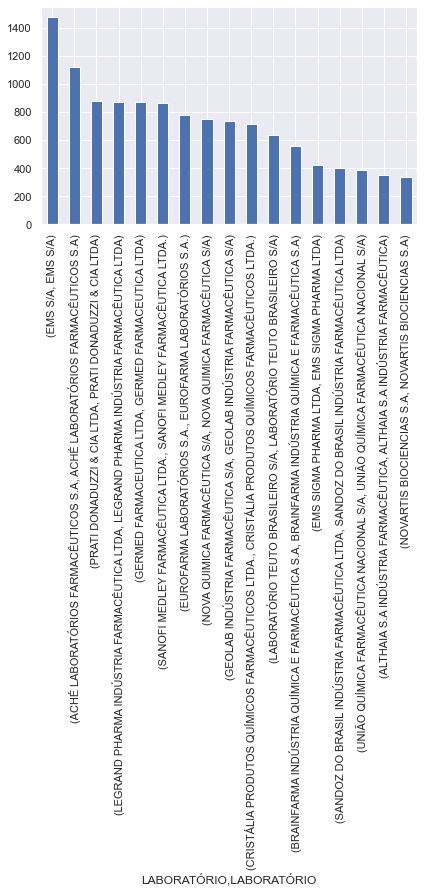

In [94]:
df_lab[df_lab['LABORATÓRIO'].isin(['EMS S/A', 'PRATI DONADUZZI & CIA LTDA', 'GERMED FARMACEUTICA LTDA', 'NOVA QUIMICA FARMACÊUTICA S/A',
                               'LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA', 'LABORATÓRIO TEUTO BRASILEIRO S/A', 'SANOFI MEDLEY FARMACÊUTICA LTDA.',
                               'EUROFARMA LABORATÓRIOS S.A.', 'GEOLAB INDÚSTRIA FARMACÊUTICA S/A', 'ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A',
                                  'CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.',
                                  'BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A',
                                  'EMS SIGMA PHARMA LTDA',
                                  'SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA',
                                  'UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A',
                                  'ALTHAIA S.A INDÚSTRIA FARMACÊUTICA',
                                  'NOVARTIS BIOCIENCIAS S.A'])].groupby('LABORATÓRIO')['LABORATÓRIO'].value_counts().sort_values(ascending=False).plot.bar();

**A partir da seleção dos 20 maiores labs do datasets, procurei analisar apenas o maior, e observar quais as substâncias de maior aparecimento nesse laboratório, e quais os tipos de produtos produzidos.**

In [97]:
df.loc[(df['LABORATÓRIO']=='EMS S/A')].groupby('LABORATÓRIO')['SUBSTÂNCIA'].value_counts().head(20)

LABORATÓRIO  SUBSTÂNCIA                                   
EMS S/A      PREGABALINA                                      31
             HIDROCLOROTIAZIDA;OLMESARTANA MEDOXOMILA         24
             OLANZAPINA                                       24
             RIVAROXABANA                                     24
             OLMESARTANA MEDOXOMILA                           20
             CITRATO DE SILDENAFILA                           18
             CLORIDRATO DE VENLAFAXINA                        17
             ACETILCISTEÍNA                                   16
             CLORIDRATO  DE ONDANSETRONA DI-HIDRATADO         16
             CLORIDRATO DE DONEPEZILA                         16
             CLORIDRATO DE MEMANTINA                          16
             HEMIFUMARATO DE BISOPROLOL                       16
             NITAZOXANIDA                                     16
             BROMIDRATO DE GALANTAMINA                        15
             CLARITROMICINA    

**Nota-se a substância Pregabalina com maior aparecimento dentro do labs EMS.<br>**

Percebe-se uma diferença entre a substância mais produzida como um todo (Colecalciferol), e a substância de maior incidência (Pregabalina) no labs EMS. A pregabalina é muito utilizado no tratamento da dor neuropática, ansiedade e fibromialgia.

A partir dessa observação foi realizado um `groupby` para olhar quais Tarja o labs EMS mais produz.

In [98]:
df.loc[(df['LABORATÓRIO']=='EMS S/A')].groupby('LABORATÓRIO')['TARJA'].value_counts()

LABORATÓRIO  TARJA                          
EMS S/A      Tarja Vermelha(*)                  710
             Tarja  Vermelha                    259
             Tarja Vermelha (*)                 233
             Tarja Venda Livre/Sem Tarja (*)    109
             Tarja -(*)                          76
             Tarja Venda Livre                   56
             Tarja Preta(*)                      31
             - (*)                                1
             Tarja  Preta                         1
Name: TARJA, dtype: int64

**Para especificamente o Tipo de Produto, o labs EMS possuí um maior foco nos medicamentos Genéricos como demonstra a tabela a baixo.**

In [99]:
df.loc[(df['LABORATÓRIO']=='EMS S/A')].groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()

LABORATÓRIO  TIPO DE PRODUTO (STATUS DO PRODUTO)
EMS S/A      Genérico                               926
             Similar                                422
             Específico                              62
             Novo                                    43
             Biológico                               16
             Fitoterápico                             7
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

**Realizei uma comparação dos Tipos de Produto de labs Multinacionais como NOVARTIS BIOCIENCIAS S.A e BAYER S.A., com o que foi visto à cima do labs EMS.**

In [100]:
df.loc[(df['LABORATÓRIO']=='NOVARTIS BIOCIENCIAS S.A')].groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()

LABORATÓRIO               TIPO DE PRODUTO (STATUS DO PRODUTO)
NOVARTIS BIOCIENCIAS S.A  Novo                                   239
                          Genérico                                47
                          Produto de Terapia Avançada             23
                          Biológico                               20
                          Similar                                  8
                          Específico                               1
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

In [101]:
df.loc[(df['LABORATÓRIO']=='BAYER S.A.')].groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()

LABORATÓRIO  TIPO DE PRODUTO (STATUS DO PRODUTO)
BAYER S.A.   Novo                                   189
             Similar                                 17
             Específico                              14
             Biológico                               12
             Biológicos                               2
             Radiofármaco                             1
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

**Nota-se o quanto to foco dos labs Multinacionais é em produzir medicamentos do genêro Novo, e o quanto o lab brasileiro EMS tem seu foco em medicamentos Genéricos.**

Voltando a analises gerais, observa-se os tipos de produtos (medicamentos) e a contagem dentro do datasets.

**Verifica-se a diferença da produção de medicamentos Genéricos e Similar para os demais.**

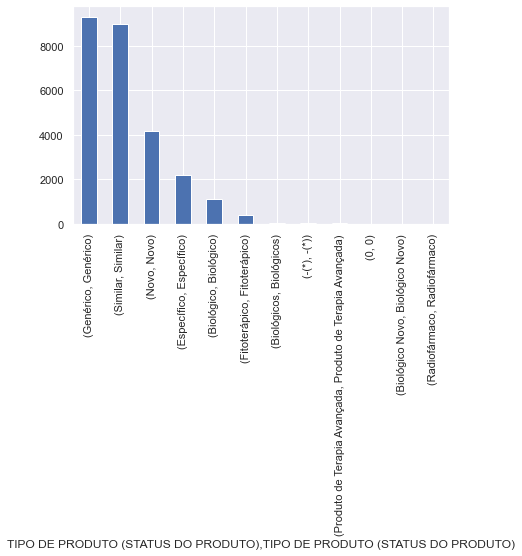

In [39]:
df.groupby('TIPO DE PRODUTO (STATUS DO PRODUTO)')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().sort_values(ascending=False).plot.bar();

Depois foi realizado mais um agrupamento do Laboratório com o Tipo de Produto, e foi gerado uma contagem para observar onde está o foco da empresas.<br>

**Nota-se que apenas o labs brasileiro SANOFI MEDLEY FARMACÊUTICA LTDA. tem um foco maior em medicamentos do gênero Novo.**

In [12]:
df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().head(20)

Genérico                       9307
Similar                        8991
Novo                           4156
Específico                     2210
Biológico                      1137
Fitoterápico                    404
Biológicos                       54
-(*)                             24
Produto de Terapia Avançada      23
0                                 2
Biológico Novo                    1
Radiofármaco                      1
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

In [53]:
df.groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().sort_values(ascending=False).head(25)

LABORATÓRIO                                      TIPO DE PRODUTO (STATUS DO PRODUTO)
EMS S/A                                          Genérico                               926
PRATI DONADUZZI & CIA LTDA                       Genérico                               772
GERMED FARMACEUTICA LTDA                         Genérico                               651
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A              Similar                                523
NOVA QUIMICA FARMACÊUTICA S/A                    Genérico                               515
CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.  Similar                                508
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA       Genérico                               458
EMS S/A                                          Similar                                422
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA       Similar                                387
LABORATÓRIO TEUTO BRASILEIRO S/A                 Genérico                              

In [45]:
df_g = df.loc[(df['TIPO DE PRODUTO (STATUS DO PRODUTO)']=='Genérico')]

Nota-se os labs que mais produzem medicamentos genéricos.

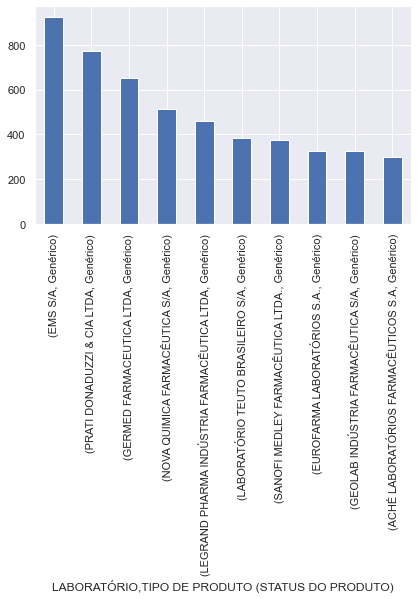

In [48]:
df_g[df_g['LABORATÓRIO'].isin(['EMS S/A', 'PRATI DONADUZZI & CIA LTDA', 'GERMED FARMACEUTICA LTDA', 'NOVA QUIMICA FARMACÊUTICA S/A',
                               'LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA', 'LABORATÓRIO TEUTO BRASILEIRO S/A', 'SANOFI MEDLEY FARMACÊUTICA LTDA.',
                               'EUROFARMA LABORATÓRIOS S.A.', 'GEOLAB INDÚSTRIA FARMACÊUTICA S/A', 'ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A'])].groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().sort_values(ascending=False).plot.bar();

In [67]:
df_s = df.loc[(df['TIPO DE PRODUTO (STATUS DO PRODUTO)']=='Similar')]
df_s.head(10)

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,520500901178410,57600510011,7896210500354,-,-,TALCO ALÍVIO,TALQUEIRA C/ 100 G,...,8.50,9.70,Não,Não,Não,Não,NaN,Negativa,Não,Tarja -(*)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,530917060013104,1002001390025,7896116871497,-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,...,163.25,186.12,Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha(*)
27,FINASTERIDA,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525501702110315,1002900190010,7897337709019,-,-,PROPECIA,1 MG COM REV CT BL AL AL X 30,...,180.66,205.98,Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha(*)
109,FUROATO DE MOMETASONA,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525515100018404,1002901930018,7897337709149,-,-,NITES,"0,5 MG/G SUS SPR NAS CT FR SPR PLAS PEAD OPC X...",...,100.84,103.35,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha(*)
110,DESOGESTREL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525515120018804,1002901940013,7897337713382,-,-,PÉROLA,"0,075 MG COM REV CT BL AL PLAS TRANS X 28",...,42.44,43.49,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
111,DESOGESTREL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525515120018704,1002901940021,7897337713399,-,-,PÉROLA,"0,075 MG COM REV CT BL AL PLAS TRANS X 84",...,109.59,112.32,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
123,CLORIDRATO DE AMIODARONA,61.230.314/0001-75,LIBBS FARMACÊUTICA LTDA,523700202111413,1003300010057,7896094200081,-,-,ANCORON,200 MG COM REV CT BL AL AL X 20,...,36.94,37.87,Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha(*)
124,CLORIDRATO DE AMIODARONA,61.230.314/0001-75,LIBBS FARMACÊUTICA LTDA,523712010025203,1003300010133,7896094207844,-,-,ANCORON,100 MG COM REV CT BL AL AL X 30,...,25.80,26.45,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha(*)
125,CLORIDRATO DE AMIODARONA,61.230.314/0001-75,LIBBS FARMACÊUTICA LTDA,523712010025303,1003300010141,7896094207851,-,-,ANCORON,200 MG COM REV CT BL AL AL X 30,...,51.68,52.96,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha(*)
126,CLORIDRATO DE AMIODARONA,61.230.314/0001-75,LIBBS FARMACÊUTICA LTDA,523720120045507,1003300010151,7896094210981,-,-,ANCORON,100 MG COM REV CT BL AL AL X 60,...,51.61,52.89,Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha(*)


Percebe-se os labs que mais produzem medicamentos similares.

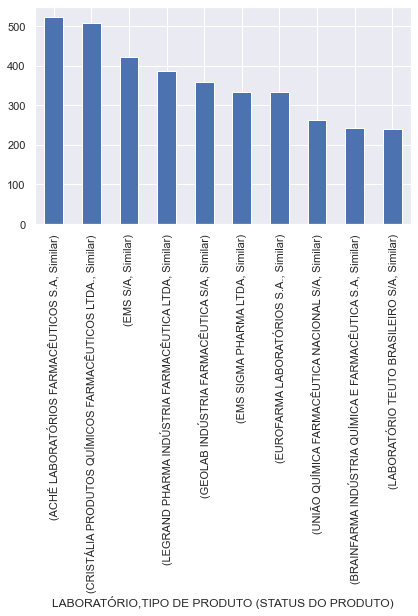

In [68]:
df_s[df_s['LABORATÓRIO'].isin(['ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A', 'CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.', 'EMS S/A',
                               'LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA', 'GEOLAB INDÚSTRIA FARMACÊUTICA S/A', 'EUROFARMA LABORATÓRIOS S.A.',
                               'EMS SIGMA PHARMA LTDA', 'UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A', 'BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A', 'LABORATÓRIO TEUTO BRASILEIRO S/A'])].groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().sort_values(ascending=False).plot.bar();

In [61]:
df_n.head(10)

LABORATÓRIO                          TIPO DE PRODUTO (STATUS DO PRODUTO)
NOVARTIS BIOCIENCIAS S.A             Novo                                   239
SANOFI MEDLEY FARMACÊUTICA LTDA.     Novo                                   229
GLAXOSMITHKLINE BRASIL LTDA          Novo                                   210
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A  Novo                                   208
BAYER S.A.                           Novo                                   189
JANSSEN-CILAG FARMACÊUTICA LTDA      Novo                                   172
WYETH INDÚSTRIA FARMACÊUTICA LTDA    Novo                                   164
TAKEDA PHARMA LTDA.                  Novo                                   140
ASTRAZENECA DO BRASIL LTDA           Novo                                   133
ORGANON FARMACÊUTICA LTDA.           Novo                                   110
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

In [63]:
df_n = df.loc[(df['TIPO DE PRODUTO (STATUS DO PRODUTO)']=='Novo')]

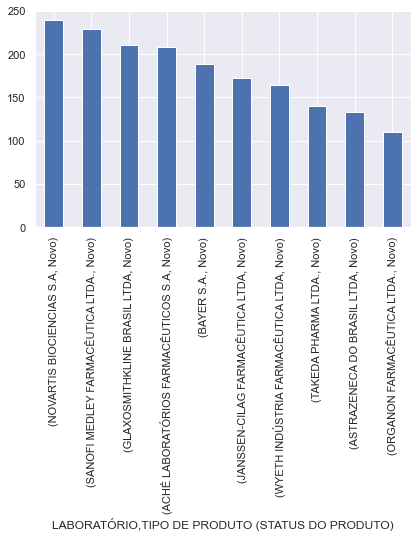

In [64]:
df_n[df_n['LABORATÓRIO'].isin(['NOVARTIS BIOCIENCIAS S.A', 'SANOFI MEDLEY FARMACÊUTICA LTDA.', 'GLAXOSMITHKLINE BRASIL LTDA',
                               'ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A', 'BAYER S.A.', 'JANSSEN-CILAG FARMACÊUTICA LTDA',
                               'WYETH INDÚSTRIA FARMACÊUTICA LTDA', 'TAKEDA PHARMA LTDA.', 'ASTRAZENECA DO BRASIL LTDA', 'ORGANON FARMACÊUTICA LTDA.'])].groupby('LABORATÓRIO')['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().sort_values(ascending=False).plot.bar();

E os laboratórios que mais produzem medicamentos Novo.

## Conclusão:

A substância mais mais presente dentro do datasets é o Colecalciferol, e a sua distribuição de preços está mais concentrada na faixa do primeiro quartil.
O laboratório com maior produção é a empresa EMS, que distoa dos demais através do maior foco em medicamento Genéricos, e Similares. Outro ponto é que a indústria está mais focada em medicamentos tarjados (vermelha e preta).
Há uma diferença no foco de produção de empresas nacionais para as empresas multinacionais.